# 对tensor操作

In [1]:
import torch

tensor操作中使用data进行运算对原有的反向求导没有作用

In [2]:
x = torch.ones(1,requires_grad=True)
print(x.data)
print(x.data.requires_grad)

tensor([1.])
False


In [3]:
y = 2*x
x.data *= 100
print(x)

tensor([100.], requires_grad=True)


In [4]:
y.backward()
print(x.grad)

tensor([2.])


F:\Anaconda3\envs\pytorch\lib\site-packages\torch\autograd\__init__.py:149: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag


# 示例1：线性回归

In [1]:
import torch
import numpy as np

## 制作线性回归数据集

In [2]:
input_num = 2 #输入特征
examples_num = 1000 #输入的实例数量
x = torch.from_numpy(np.random.normal(0,1,(examples_num,input_num)))   #创建x     1000*2
true_w = torch.tensor([3.4,-4.0],dtype= torch.double).view(2,1)                 #权重矩阵 2*1
true_b = torch.tensor(2.0)                          #偏置b
labels = torch.mm(x,true_w)+true_b
#加噪声
labels += torch.from_numpy(np.random.normal(0,0.1,(examples_num,1)))
print(x.size())
print(label.size())

torch.Size([1000, 2])


NameError: name 'label' is not defined

数据集创建完毕

定义绘图函数，以显示图片

In [6]:
import matplotlib.pyplot as plt

In [7]:
def set_figsize(figsize=(10,5)):
    plt.rcParams['figure.figsize'] = figsize

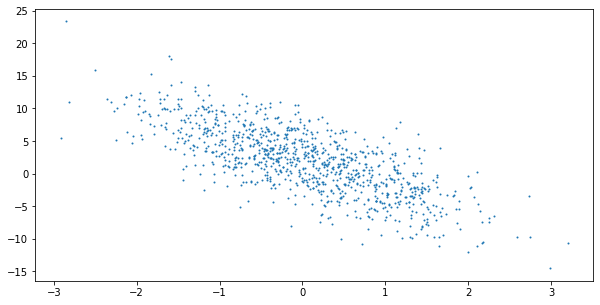

In [8]:
set_figsize()
#画布初始化
plt.scatter(x[:,1].numpy(),labels.numpy(),1)

## 数据读取

In [9]:
import random

绘制出数据集features【1】与label的线性散点图

In [10]:
def data_iter(batch_size,features,labels):
    examples_num = len(features)
    indices = list(range(examples_num))
    random.shuffle(indices)#样本随机读取
    for i in range(0,examples_num,batch_size):
        j = torch.LongTensor(indices[i:min(i+batch_size,examples_num)])   #创建indices的切片,indices已经随机
        yield x.index_select(0,j),labels.index_select(0,j)

--函数用法</br>
yield封装一个迭代器，next调用时生效
--index_select(0,j)</br>
0代表按行索引，1表示按列索引，j代表索引的index</br>
处理方式很有意思

In [11]:
for train_data,train_labels in data_iter(batch_size=64,features=x,labels=labels):
    print(train_data.size())
    print(train_labels.size())
    print("---------------")
#按照batch_size输出

torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([64, 2])
torch.Size([64, 1])
---------------
torch.Size([40, 2])
torch.Size([40, 1])
---------------


## 初始化模型参数

In [12]:
w = torch.tensor(np.random.normal(0,0.1,(input_num,1)),dtype=torch.double)  #w 2*1
b = torch.zeros(1,dtype = torch.double)

In [13]:
w.requires_grad_(True)
b.requires_grad_(True)  #使用SGD需要他们的梯度

tensor([0.], dtype=torch.float64, requires_grad=True)

# 定义模型——线性回归函数定义

In [14]:
def linear(x,w,b):
    return torch.mm(x,w)+b

# 定义损失函数

In [15]:
def squred_loss(y_pred,y):
    return (y_pred-y)**2/2      #MES loss的一半

# 定义优化算法

In [16]:
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr*param.grad/batch_size        #attention:使用的param.data03，不影响反向传播

# 训练模型

In [17]:
from tqdm import trange

In [19]:
lr = 0.03 #learning rate
num_epochs = 100
net = linear
batch_size = 64
loss = squred_loss
for epoch in trange(num_epochs):
    for train_data,train_labels in data_iter(batch_size,x,labels):
        l = loss(net(train_data,w,b),train_labels).sum() #get loss
        l.backward()
        sgd([w,b],lr,batch_size)
        
        #梯度清零
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(x,w,b),labels)
    print("epoch:%d, loss: %f "%(epoch+1,train_l.mean().item()))

 28%|████████████▎                               | 28/100 [00:00<00:00, 272.58it/s]

epoch:1, loss: 0.412564 
epoch:2, loss: 0.172595 
epoch:3, loss: 0.073983 
epoch:4, loss: 0.033505 
epoch:5, loss: 0.016893 
epoch:6, loss: 0.010067 
epoch:7, loss: 0.007262 
epoch:8, loss: 0.006107 
epoch:9, loss: 0.005625 
epoch:10, loss: 0.005433 
epoch:11, loss: 0.005353 
epoch:12, loss: 0.005320 
epoch:13, loss: 0.005306 
epoch:14, loss: 0.005301 
epoch:15, loss: 0.005299 
epoch:16, loss: 0.005298 
epoch:17, loss: 0.005297 
epoch:18, loss: 0.005297 
epoch:19, loss: 0.005297 
epoch:20, loss: 0.005297 
epoch:21, loss: 0.005297 
epoch:22, loss: 0.005297 
epoch:23, loss: 0.005298 
epoch:24, loss: 0.005298 
epoch:25, loss: 0.005298 
epoch:26, loss: 0.005297 
epoch:27, loss: 0.005297 
epoch:28, loss: 0.005297 
epoch:29, loss: 0.005297 
epoch:30, loss: 0.005298 
epoch:31, loss: 0.005297 
epoch:32, loss: 0.005297 
epoch:33, loss: 0.005297 
epoch:34, loss: 0.005297 
epoch:35, loss: 0.005297 
epoch:36, loss: 0.005297 
epoch:37, loss: 0.005297 
epoch:38, loss: 0.005298 
epoch:39, loss: 0.005

100%|███████████████████████████████████████████| 100/100 [00:00<00:00, 270.26it/s]

epoch:53, loss: 0.005297 
epoch:54, loss: 0.005297 
epoch:55, loss: 0.005297 
epoch:56, loss: 0.005297 
epoch:57, loss: 0.005297 
epoch:58, loss: 0.005297 
epoch:59, loss: 0.005297 
epoch:60, loss: 0.005297 
epoch:61, loss: 0.005297 
epoch:62, loss: 0.005297 
epoch:63, loss: 0.005297 
epoch:64, loss: 0.005297 
epoch:65, loss: 0.005297 
epoch:66, loss: 0.005297 
epoch:67, loss: 0.005297 
epoch:68, loss: 0.005297 
epoch:69, loss: 0.005298 
epoch:70, loss: 0.005297 
epoch:71, loss: 0.005297 
epoch:72, loss: 0.005297 
epoch:73, loss: 0.005297 
epoch:74, loss: 0.005298 
epoch:75, loss: 0.005297 
epoch:76, loss: 0.005298 
epoch:77, loss: 0.005297 
epoch:78, loss: 0.005297 
epoch:79, loss: 0.005297 
epoch:80, loss: 0.005297 
epoch:81, loss: 0.005297 
epoch:82, loss: 0.005298 
epoch:83, loss: 0.005297 
epoch:84, loss: 0.005297 
epoch:85, loss: 0.005297 
epoch:86, loss: 0.005297 
epoch:87, loss: 0.005297 
epoch:88, loss: 0.005297 
epoch:89, loss: 0.005297 
epoch:90, loss: 0.005297 
epoch:91, lo

In [21]:
print("真实w=",true_w,"b=",true_b)
print("预测w=",w,"b=",b)

真实w= tensor([[ 3.4000],
        [-4.0000]], dtype=torch.float64) b= tensor(2.)
预测w= tensor([[ 3.3985],
        [-3.9966]], dtype=torch.float64, requires_grad=True) b= tensor([2.0019], dtype=torch.float64, requires_grad=True)
